## Testing Notebook
Notebook for testing new movement and state restoration functions


In [1]:
%load_ext autoreload
%autoreload 2
import liftout

from liftout import utils
from liftout.fibsem import utils as fibsem_utils
from liftout.fibsem import movement, calibration, sampleposition, acquire
from autoscript_sdb_microscope_client.structures import StagePosition, MoveSettings
from autoscript_sdb_microscope_client import SdbMicroscopeClient

import numpy as np
import matplotlib.pyplot as plt


In [21]:
!pwd

/c/Users/Admin/Github/autoliftout/liftout/tools


In [30]:
# init microscope
microscope = fibsem_utils.initialise_fibsem("10.0.0.1")
settings = utils.load_config("../protocol_liftout.yml")

Client connecting to [10.0.0.1:7520]...
Client connected to [10.0.0.1:7520]


In [23]:
print(settings["initial_position"])

{'sample_grid': {'x': -0.0032375, 'y': 0.0039354, 'z': 0.031379, 'coordinate_system': 'Raw'}, 'landing_grid': {'x': 0.00276265, 'y': 0.0039354, 'z': 0.031379, 'coordinate_system': 'Raw'}}


In [56]:
initial_position = StagePosition(
    x=settings["initial_position"]["sample_grid"]["x"],
    y=settings["initial_position"]["sample_grid"]["y"],
    z=settings["initial_position"]["sample_grid"]["z"],
    r=np.deg2rad(settings["system"]["stage_rotation_flat_to_electron"]),
    t=np.deg2rad(settings["system"]["pretilt_angle"]), 
    coordinate_system=settings["initial_position"]["sample_grid"]["coordinate_system"])

print(initial_position)

stage_position = initial_position
print(stage_position)

StagePosition(x=-0.0032375, y=0.0039354, z=0.031379, t=0.4712389, r=0.87266463, coordinate_system=Raw)
StagePosition(x=-0.0032375, y=0.0039354, z=0.031379, t=0.4712389, r=0.87266463, coordinate_system=Raw)


In [57]:
# Move to raw position
movement.safe_absolute_stage_movement(microscope, initial_position)

# move to initial position



StagePosition(x=-0.0027247596, y=0.003141625, z=0.0034623671, t=0.47124004, r=0.89017448, coordinate_system=Specimen)

INITIAL:  StagePosition(x=-0.0032375, y=0.0039354, z=0.031379, t=0.4712389, r=3.1415927, coordinate_system=Raw)
ROTATION:  StagePosition(x=-0.0032375, y=0.0039354, z=0.031379, t=0.4712389, r=3.1415927, coordinate_system=Raw)


In [84]:
def take_and_show_imgs(hfw=150e-6):
    image_settings = {"resolution":settings["imaging"]["resolution"],
                "dwell_time": settings["imaging"]["dwell_time"],
                "hfw":hfw,
                "autocontrast": True,
                "gamma": settings["gamma"],
                "beam_type":acquire.BeamType.ELECTRON,
                "save":False,
                "label": "NONE"
                   }
    eb_img, ib_img = acquire.take_reference_images(microscope, image_settings)

    fig, ax = plt.subplots(1, 2, figsize=(15, 15))
    ax[0].imshow(eb_img.data, cmap="gray")
    ax[1].imshow(ib_img.data, cmap="gray")
    plt.show()
# take_and_show_imgs()

### State Restoration

AutoLiftoutStage.MillTrench
MicroscopeState(timestamp='20220214.150321', absolute_position=StagePosition(x=-0.00266025, y=0.0036431667, z=0.031284208, t=0.47124121, r=0.87271741, coordinate_system=Raw), eb_working_distance=0.0038478769139002715, ib_working_distance=0.01659833946769498, eb_beam_current=5e-11, ib_beam_current=2e-11, eucentric_calibration=True, last_completed_stage=<AutoLiftoutStage.MillTrench: 1>)


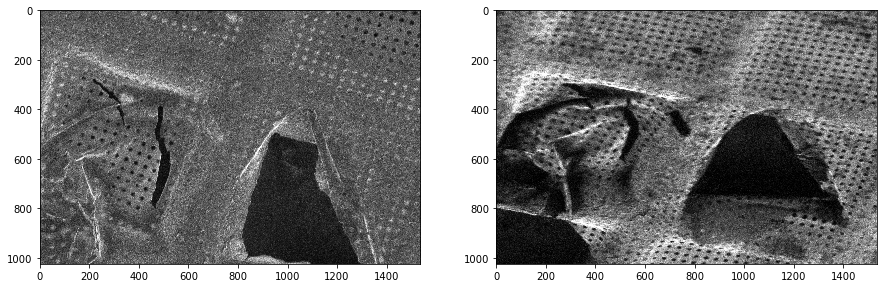

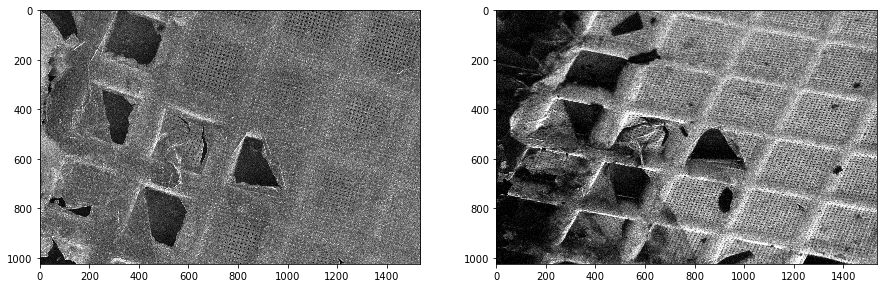

In [89]:
# initial eucentric state
current_stage = sampleposition.AutoLiftoutStage.MillTrench

print(current_stage)
c_ms = calibration.get_current_microscope_state(microscope=microscope, stage =current_stage, eucentric=True)

print(c_ms)

take_and_show_imgs(hfw=150e-6)
take_and_show_imgs(hfw=400e-6)


MicroscopeState(timestamp='20220214.150541', absolute_position=StagePosition(x=0.0018874167, y=-0.0018061667, z=0.030967335, t=0.43633351, r=-2.2864004, coordinate_system=Raw), eb_working_distance=0.004100606791617305, ib_working_distance=0.01659833946769498, eb_beam_current=5e-11, ib_beam_current=2e-11, eucentric_calibration=True, last_completed_stage=<AutoLiftoutStage.MillTrench: 1>)


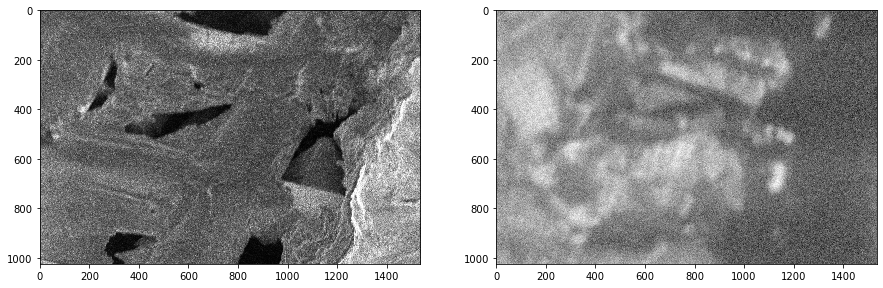

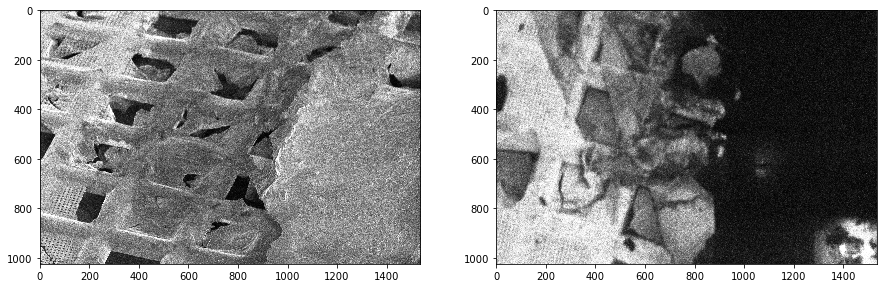

In [91]:
# messed up state
messed_ms = calibration.get_current_microscope_state(microscope=microscope, stage =current_stage, eucentric=True)
print(messed_ms)
take_and_show_imgs(hfw=150e-6)
take_and_show_imgs(hfw=400e-6)

In [92]:
# restore state
calibration.set_microscope_state(microscope=microscope, microscope_state=c_ms)

MicroscopeState(timestamp='20220214.150642', absolute_position=StagePosition(x=-0.0026603333, y=0.00364325, z=0.031284208, t=0.47124082, r=0.87275137, coordinate_system=Raw), eb_working_distance=0.004200643040129351, ib_working_distance=0.01659833946769498, eb_beam_current=5e-11, ib_beam_current=2e-11, eucentric_calibration=True, last_completed_stage=<AutoLiftoutStage.MillTrench: 1>)


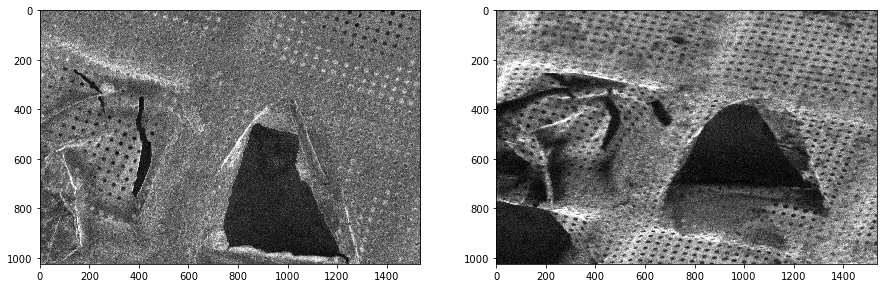

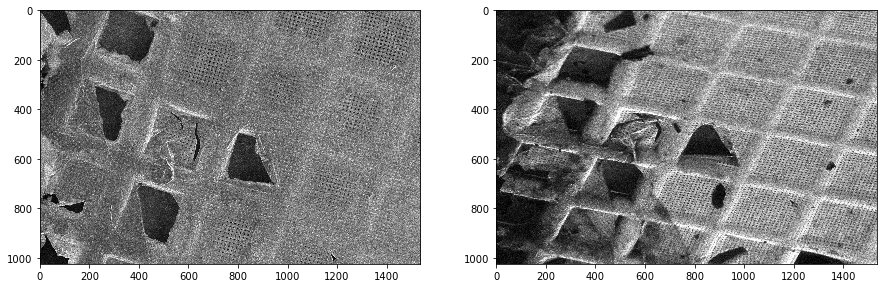

In [93]:
# check state
c_ms2 = calibration.get_current_microscope_state(microscope=microscope, stage =current_stage, eucentric=True)
print(c_ms2)
take_and_show_imgs(hfw=150e-6)
take_and_show_imgs(hfw=400e-6)

## Metadata


In [2]:
settings = utils.load_config("../protocol_liftout.yml")

In [5]:

save_metadata(settings, "")

In [ ]:


import os

os.path.exists(r"'C:/Users/Admin/Github/autoliftout/liftout/log/test_movement_2022-02-15.102758\\5c4e0256-b704-4ea9-80f3-981601a47ce8\\thin_lamella_crosscorrelation_ref_ib")